$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\Xvh}{\hat{\mathbf{X}}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\Uv}{\mathbf{U}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Zvh}{\hat{\mathbf{Z}}}
\newcommand{\Ev}{\mathbf{E}}
\newcommand{\onev}{\mathbf{1}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
$


# A2.1 Three-Layer Neural Network

For this assignment, we modify the two-layer neural network matrix equations and code from lecture notes to become a three-layer neural network, one with two hidden layers.  In the following diagram, you will be adding another layer on the left between in the inputs, $x$, and the show hiddden layer.

You must complete three steps.
1. Complete the matrix equations using latex notation in the markdown cell,
2. Implement the required functions in python.
3. Perform the described experiments.

## Network Diagram
Three-layer neural network with two hidden layers

![Two Layers](twoHiddenLayers.png)

$$ 
\begin{align*}
N &= \text{ number of samples } \\
I &= \text{ the number of attributes in each sample }\\
K &= \text{ number of units in output layer } \\
H_1 &= \text{ number of units in first hidden layer }\\
H_2 &= \text{ number of units in second hidden layer }\\
~\\
\Zv_1 &= \tanh(\Xvh\, \Uv) \\
\Zv_2 &= \tanh(\Zvh_1\, \Vv) \\
\Yv &= \Zvh_2\, \Wv\\
\Ev &= \frac{1}{NK} \sum_{n=1}^N \sum_{k=1}^K (\Tv_{n,k} - \Yv_{n,k})^2 \\
~\\
%------------------------------------
% Gradient of 'E' with respect to 'Y'
\nabla_\Yv E_{n,k} &= \frac{-2}{NK} (\Tv_{n,k} - \Yv_{n,k})\\
~\\ 
%------------------------------------
% Gradient of 'E' with respect to 'W'
\nabla_\Wv E &=  \underbrace{\underbrace{\Zvh_2^T}_{H+1\times N} \underbrace{\delta_\Yv}_{N\times K}}_{H+1\times K} \;\;\;\;\text{ where } \delta_\Yv = \frac{-2}{NK} (\Tv - \Yv)\\
~\\ 
%------------------------------------
% Gradient of 'E' with respect to 'V'
\nabla_\Vv E &= \underbrace{\underbrace{\Zvh_1^T}_{I+1\times N} \; \underbrace{\delta_{\Zv_2}}_{N\times H}}_{I+1\times H} \;\;\;\;\text{ where } \delta_{\Zv_2} = (\delta_\Yv \; \Wv_{1:}^T)\; \cdot\; (1-\Zv_2^2) \;\;\;\; \text{ if } f(\Zvh_1 \Vv) = \tanh(\Zvh_1 \Vv)\\
~\\ 
%------------------------------------
% Gradient of 'E' with respect to 'U'
\nabla_\Uv E &= \underbrace{\underbrace{\Xvh^T}_{I+1\times N} \; \underbrace{\delta_{\Zv_1}}_{N\times H}}_{I+1\times H} \;\;\;\;\text{ where } \delta_{\Zv_z1} = (\delta_{\Zv_2} \; \Vv_{1:}^T)\; \cdot\; (1-\Zv_1^2) \;\;\;\; \text{ if } f(\Xvh \Uv) = \tanh(\Xvh \Uv)\\
\end{align*}
$$

## Code

Modify the functions `network` `error_gradient` and `mse` to do the compuations for a three-layer neural network.  They must have the following arguments:
* `Y = network(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, all_outputs=False)`
or
* `Y, Z1, Z2 = network(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, all_outputs=True)`
* `gradient = error_gradient(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T)`
* `mean_squared_error = mse(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T)`

### Import code needed in this notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas
import optimizers as opt  # from Lecture Notes

### network function

In [2]:
# -------------------------------------------------------
# Defines the forward calculation of a three layer neural 
# network with two hidden layers
# Inputs:
#    w           : Weights for ALL layers   
#    n_inputs    : Number of input values
#    n_hiddens_1 : Number of elements in hidden layer 1
#    n_hiddens_2 : Number of elements in hidden layer 2
#    n_outputs   : Number of outputs
#    X           : Input data
#    all_outputs : Flag that controls output content
#                  TRUE  = Y, Z1 & Z2
#                  FALSE = Y
# Output:
#   Data from the network based on 'all_outputs' flag
def network(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, all_outputs=False):
    # Determine amount of data (number of weights) for each layer
    n_U = (n_inputs + 1) * n_hiddens_1
    n_V = (n_hiddens_1 + 1) * n_hiddens_2
    
    # 'w' contains data for ALL layers.  Extract the data for each
    # layer based on size determined above
    U = w[0:n_U].reshape((n_inputs + 1, n_hiddens_1))
    V = w[n_U: n_U + n_V].reshape((n_hiddens_1 + 1, n_hiddens_2))
    W = w[n_U + n_V:].reshape((n_hiddens_2 + 1, n_outputs))
    
    # Determine the output of each Layer (forward calculation)
    Z_1 = np.tanh(U[0:1, :] + X @ U[1:, :])
    Z_2 = np.tanh(V[0:1, :] + Z_1 @ V[1:, :])
    Y = W[0:1, :] + Z_2 @ W[1:, :]
    
    # Return output and conditionally the values from the hidden layers
    return (Y, Z_1, Z_2) if all_outputs else Y 

##### network Function Verification (from A2grader.py)

In [3]:
X = np.arange(3 * 4).reshape((3, 4)) * 0.1
T = np.hstack(( np.sin(X[:, 0:1]) + X[:, 1:2],
                X[:, 2:3] * -0.5,
                X[:, 3:4] ** 2))
n_inputs = X.shape[1]
n_outputs = T.shape[1]
n_hiddens_1 = 6
n_hiddens_2 = 2
n_w = (n_inputs + 1) * n_hiddens_1 + (n_hiddens_1 + 1) * n_hiddens_2 + (n_hiddens_2 + 1) * n_outputs
w = (np.arange(n_w) - n_w/2) * 0.01

In [4]:
Y = network(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X)
Y

array([[0.12022254, 0.12773632, 0.13525011],
       [0.08581156, 0.09176614, 0.09772072],
       [0.05582873, 0.06042448, 0.06502022]])

In [5]:
Y, Z1, Z2 = network(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, all_outputs=True)
print('-' * 80)
print("Y =")
print(Y)
print('-' * 80)
print("Z1 =")
print(Z1)
print('-' * 80)
print("Z2 =")
print(Z2)

--------------------------------------------------------------------------------
Y =
[[0.12022254 0.12773632 0.13525011]
 [0.08581156 0.09176614 0.09772072]
 [0.05582873 0.06042448 0.06502022]]
--------------------------------------------------------------------------------
Z1 =
[[-0.29496888 -0.28029298 -0.26548486 -0.25055041 -0.23549575 -0.22032722]
 [-0.45262762 -0.4268185  -0.40029486 -0.37308313 -0.34521403 -0.31672254]
 [-0.58629394 -0.55390692 -0.51975207 -0.4838508  -0.44624361 -0.40699138]]
--------------------------------------------------------------------------------
Z2 =
[[-0.12161728 -0.12700392]
 [-0.19596638 -0.20857586]
 [-0.26095696 -0.27946846]]


### error_gradient function

In [6]:
# -------------------------------------------------------
# Defines the error_gradient calculation of a three layer
# neural network with two hidden layers
# Inputs:
#    w           : Weights for ALL layers   
#    n_inputs    : Number of input values
#    n_hiddens_1 : Number of elements in hidden layer 1
#    n_hiddens_2 : Number of elements in hidden layer 2
#    n_outputs   : Number of outputs
#    X           : Input data
#    T           : Target values (i.e. expected outputs)
# Output:
#   The adjustment needed for each weight in all layers and units
def error_gradient(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T):
    Y, Z1, Z2 = network(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, all_outputs=True)
    n_samples = X.shape[0]
    delta_Y = -2 / (n_samples * n_outputs) * (T - Y)
    Z2_hat = np.insert(Z2, 0, 1, axis=1)
    dEdW = Z2_hat.T @ delta_Y
    
    # Determine amount of data for each layer
    n_U = (n_inputs + 1) * n_hiddens_1
    n_V = (n_hiddens_1 + 1) * n_hiddens_2
    n_W = (n_hiddens_2 + 1) * n_outputs
    
    # 'w' contains data for each layer, extract the data
    # based on size determined above
    # I think this is good
    U = w[0:n_U].reshape((n_inputs + 1, n_hiddens_1))
    V = w[n_U: n_U + n_V].reshape((n_hiddens_1 + 1, n_hiddens_2))
    W = w[n_U + n_V:].reshape((n_hiddens_2 + 1, n_outputs))
    
    # Gradient of E with respect to V
    delta_Z2 = (delta_Y @ W[1:, :].T) * (1 - Z2**2)
    Z1_hat = np.insert(Z1, 0, 1, axis=1)
    dEdV = Z1_hat.T @ delta_Z2
    
    # Gradient of E with respect to U
    delta_Z1 = (delta_Z2 @ V[1:, :].T) * (1 - Z1**2)
    X_hat = np.insert(X, 0, 1, axis=1)
    dEdU = X_hat.T @ delta_Z1
 
    dEdw = np.hstack((dEdU.flatten(), dEdV.flatten(), dEdW.flatten()))

    return dEdw

##### error_gradient function Verification (from A2grader.py)

In [7]:
grad = error_gradient(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T)
grad

array([-0.01004135, -0.0140896 , -0.01848553, -0.0232127 , -0.02824685,
       -0.0335556 , -0.00785947, -0.01100037, -0.01440092, -0.01804931,
       -0.02192779, -0.02601239, -0.00886361, -0.01240933, -0.01624947,
       -0.02037058, -0.02475247, -0.02936795, -0.00986774, -0.01381829,
       -0.01809803, -0.02269185, -0.02757716, -0.03272351, -0.01087188,
       -0.01522725, -0.01994658, -0.02501312, -0.03040184, -0.03607907,
       -0.11689819, -0.13210337,  0.0677528 ,  0.07656248,  0.06395863,
        0.0722746 ,  0.05997313,  0.0677706 ,  0.0557992 ,  0.06305375,
        0.05144169,  0.05812953,  0.04690754,  0.0530058 , -0.52109147,
        0.26220599, -0.33155754,  0.12500265, -0.05571474,  0.08225796,
        0.13365384, -0.05939052,  0.08801306])

### mse (mean-squared-error) function

In [8]:
# -------------------------------------------------------
# Defines the mean squared erro calculation for a three 
# layer neural network with two hidden layers
# Inputs:
#    w           : Weights for ALL layers   
#    n_inputs    : Number of input values
#    n_hiddens_1 : Number of elements in hidden layer 1
#    n_hiddens_2 : Number of elements in hidden layer 2
#    n_outputs   : Number of outputs
#    X           : Input data
#    T           : Target values (i.e. expected outputs)
# Output:
#   The mean squared error result
def mse(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T):
    Y =  network(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X)
    return np.mean((T - Y)**2)

## Test on Air Quality Data
Use your code to, as before, predict CO from the Hour of the day.

Set up the data matrices `X` and `T` as follows.

In [9]:
data = pandas.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',', usecols=range(15), na_values=-200)
data = data[['Time', 'CO(GT)']]
data = data [:23 * 20]  # first 20 days of data
data = data.dropna(axis=0)
print('data.shape =', data.shape)

hour = [int(t[:2]) for t in data['Time']]
X = np.array(hour).reshape(-1, 1)
CO = data['CO(GT)']
T = np.array(CO).reshape(-1, 1)
np.hstack((X, T))[:10]  # show the first 10 samples of hour, CO

data.shape = (443, 2)


array([[18. ,  2.6],
       [19. ,  2. ],
       [20. ,  2.2],
       [21. ,  2.2],
       [22. ,  1.6],
       [23. ,  1.2],
       [ 0. ,  1.2],
       [ 1. ,  1. ],
       [ 2. ,  0.9],
       [ 3. ,  0.6]])

Define the network parameters.  Use the shapes of `X` and `T` to assign the number of inputs and outputs.  Define each of the two hidden layers to have 5 units.

In [10]:
n_inputs = X.shape[1]
n_hiddens_1 = 5
n_hiddens_2 = 5
n_outputs = T.shape[1]
print("n_inputs({}) n_hiddens_1({}) n_hiddens_2({}) n_outputs({})".format(
    n_inputs, n_hiddens_1, n_hiddens_2, n_outputs))

n_inputs(1) n_hiddens_1(5) n_hiddens_2(5) n_outputs(1)


Now we must define the intial weight vector.  The vector contains a value for each weight in all three layers.

In [11]:
n_U = (n_inputs + 1) * n_hiddens_1
n_V = (n_hiddens_1 + 1) * n_hiddens_2
n_W = (n_hiddens_2 + 1) * n_outputs

initial_w = np.random.uniform(-0.1, 0.1, n_U + n_V + n_W)  # range of weights is -0.1 to 0.1
print("n_U({}) n_V({}) n_W({})".format(n_U, n_V, n_W))

n_U(10) n_V(30) n_W(6)


Before training our network, standardize the input values, to change the hour to have zero mean and unit variance across the set of samples.  Change `True` to `False` to not perform this step, allowing you to compare results with and without standardization.  It is not required to show the results here.  When you check in your notebook, leave `standardize` set to `True`.

In [12]:
standardize = True

if standardize:
    X_mean = X.mean(axis=0)
    X_std = X.std(axis=0)
    
    X = (X - X_mean) / X_std
    
print(f'X mean is {X.mean(axis=0)[0]:.3f} and its standard deviation is {X.std(axis=0)[0]:.3f}')

X mean is 0.000 and its standard deviation is 1.000


Now we can train our network using each of our three optimization algorithms.

In [13]:
n_iterations = 2000

result_sgd = opt.sgd(initial_w,
                     mse, error_gradient, fargs=[n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T],
                     n_iterations=n_iterations, learning_rate=1e-1, momentum_rate=0.2, 
                     save_wtrace=True)
print(f'SGD final error is {result_sgd["ftrace"][-1]:.3f} and it took {result_sgd["time"]:.2f} seconds')

result_adam = opt.adam(initial_w, 
                       mse, error_gradient, fargs=[n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T],
                       n_iterations=n_iterations, learning_rate=1e-2, 
                       save_wtrace=True)
print(f'Adam final error is {result_adam["ftrace"][-1]:.3f} and it took {result_adam["time"]:.2f} seconds')

result_scg = opt.scg(initial_w,
                     mse, error_gradient, fargs=[n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T],
                     n_iterations=n_iterations,
                     save_wtrace=True)
print(f'SCG final error is {result_scg["ftrace"][-1]:.3f} and it took {result_scg["time"]:.2f} seconds')

SGD final error is 1.066 and it took 0.98 seconds
Adam final error is 1.231 and it took 1.06 seconds
SCG final error is 0.910 and it took 2.09 seconds


Examine the error curve and the model fits for each of the optimization algorithms.

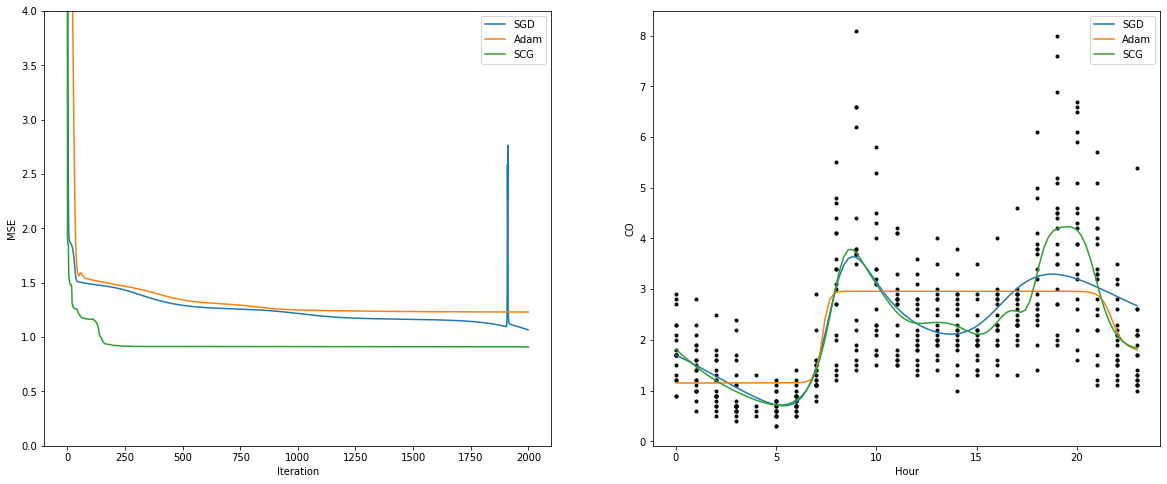

In [14]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(result_sgd['ftrace'], label='SGD')
plt.plot(result_adam['ftrace'], label='Adam')
plt.plot(result_scg['ftrace'], label='SCG')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.ylim(0, 4)

plt.subplot(1, 2, 2)
if standardize:
    plt.plot(X * X_std + X_mean, T, 'k.')  # unstandardize X
else:
    plt.plot(X, T, 'k.')
xs = np.linspace(0, 23, 100).reshape((-1, 1))
xs_standardized = (xs - X_mean) / X_std if standardize else xs
plt.plot(xs, network(result_sgd['w'], n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, xs_standardized), label='SGD')
plt.plot(xs, network(result_adam['w'], n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, xs_standardized), label='Adam')
plt.plot(xs, network(result_scg['w'], n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, xs_standardized), label='SCG')
plt.legend()
plt.xlabel('Hour')
plt.ylabel('CO');

Here is some code that tries a number of values for the key parameters of `n_iterations`, `n_hiddens_1`, `n_hiddens_2` and `learning_rate`.

**Required:** Modify the lists of values in the four for loops to try other parameter values.  Try to find ranges that work well for all three algorithms.

In [15]:
results = []
for n_iterations in [1, 10, 100, 500, 1000]:
    for nh1 in [1, 2, 5, 20]:
        for nh2 in [1, 2, 5, 20]:
            
            n_U = (n_inputs + 1) * nh1
            n_V = (nh1 + 1) * nh2
            n_W = (nh2 + 1) * n_outputs
            initial_w = np.random.uniform(-0.1, 0.1, n_U + n_V + n_W)

            result_scg = opt.scg(initial_w, mse, error_gradient, fargs=[n_inputs, nh1, nh2, n_outputs, X, T],
                                 n_iterations=n_iterations)
            results.append([n_iterations, nh1, nh2, 0, 'scg', result_scg['ftrace'][-1]])
            
            for lr in [1e-3, 1e-5, 0.1, 0.5]:
                
                result_sgd = opt.sgd(initial_w, mse, error_gradient, fargs=[n_inputs, nh1, nh2, n_outputs, X, T],
                     n_iterations=n_iterations, learning_rate=lr, momentum_rate=0)
                result_adam = opt.adam(initial_w, mse, error_gradient, fargs=[n_inputs, nh1, nh2, n_outputs, X, T],
                                       n_iterations=n_iterations, learning_rate=lr)
                results.append([n_iterations, nh1, nh2, 'scg', result_scg['ftrace'][-1]])

                results.append([n_iterations, nh1, nh2, lr, 'sgd', result_sgd['ftrace'][-1]])
                results.append([n_iterations, nh1, nh2, lr, 'adam', result_adam['ftrace'][-1]])

results = pandas.DataFrame(results, columns=('Iterations', 'nh1', 'nh2', 'lr', 'algo', 'mse'))
results

/local/mnt/workspace/bstaab/CS/cs545/venv/lib64/python3.6/site-packages/numpy/core/_methods.py:151: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/local/mnt/workspace/bstaab/CS/cs545/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()
/local/mnt/workspace/bstaab/CS/cs545/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in matmul
/local/mnt/workspace/bstaab/CS/cs545/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in multiply


,Iterations,nh1,nh2,lr,algo,mse
0,1,1,1,0,scg,1.886964
1,1,1,1,scg,1.88696,NaN
2,1,1,1,0.001,sgd,7.162422
3,1,1,1,0.001,adam,7.162422
4,1,1,1,scg,1.88696,NaN
...,...,...,...,...,...,...
1035,1000,20,20,0.1,sgd,1.266582
1036,1000,20,20,0.1,adam,0.909713
1037,1000,20,20,scg,0.90975,NaN
1038,1000,20,20,0.5,sgd,1.305322


#### Analyzing the results

##### 'scg' 
Filter the 'scg' results and only display the top ten results (lowest 'mse')

In [16]:
results[results.algo == 'scg'].sort_values(by=['mse'], ascending=True).head(10)

,Iterations,nh1,nh2,lr,algo,mse
1027,1000,20,20,0,scg,0.909750
975,1000,5,20,0,scg,0.912020
1014,1000,20,5,0,scg,0.912215
962,1000,5,5,0,scg,0.912282
819,500,20,20,0,scg,0.912296
767,500,5,20,0,scg,0.912316
923,1000,2,20,0,scg,0.912521
806,500,20,5,0,scg,0.912559
754,500,5,5,0,scg,0.912947
910,1000,2,5,0,scg,0.913075


The best result found was with the largest number of iterations (1000), twenty units in hidden layer one and two and the smallest leearning rate. Also, it looks like you get very similar results with half the iterations, or the maximum number of iterations and more units in either hidden layer.

##### 'sgd' 
Filter the 'sgd' results and only display the top ten results (lowest 'mse')

In [17]:
results[results.algo == 'sgd'].sort_values(by=['mse'], ascending=True).head(10)

,Iterations,nh1,nh2,lr,algo,mse
921,1000,2,5,0.5,sgd,1.193608
1022,1000,20,5,0.1,sgd,1.248570
970,1000,5,5,0.1,sgd,1.252227
1009,1000,20,2,0.1,sgd,1.259794
957,1000,5,2,0.1,sgd,1.263629
1035,1000,20,20,0.1,sgd,1.266582
778,500,5,20,0.5,sgd,1.270889
918,1000,2,5,0.1,sgd,1.273294
866,1000,1,5,0.1,sgd,1.277993
869,1000,1,5,0.5,sgd,1.279044


The best result was found with the largest number of iterations (1000), two units in hidden layer one and two and a learning rate of 0.5.  Overall, the number of iterations seems to have the biggest impact, followed by the learning rate and number of units in a hidden layer.

##### 'adam' 
Filter the 'adam' results and only display the top ten results (lowest 'mse')

In [18]:
results[results.algo == 'adam'].sort_values(by=['mse'], ascending=True).head(10)

,Iterations,nh1,nh2,lr,algo,mse
1036,1000,20,20,0.1,adam,0.909713
828,500,20,20,0.1,adam,0.910107
984,1000,5,20,0.1,adam,0.911928
987,1000,5,20,0.5,adam,0.911978
971,1000,5,5,0.1,adam,0.912429
779,500,5,20,0.5,adam,0.912856
763,500,5,5,0.1,adam,0.913591
776,500,5,20,0.1,adam,0.915007
932,1000,2,20,0.1,adam,0.920241
880,1000,1,20,0.1,adam,0.934240


The best result was found with 500 iterations, the largest number of units (20) in hidden layer one and two and a learning rate of 0.1.  I find it a little odd that the second best result had the exact same configuration as the best result, but performed slightly worse with more iterations.  Overall, it looks like the learning rate has the biggest impact on this algorithm.

### Overall result summary

From the three filtered results above, it can bee seen that all three algorithms ('scg', 'sgd' & 'adam') had the best result with 
- iterations = 1000
- nh1 = 20
- nh2 = 20  
  
The 'sgd' and 'adam' functions worked best with a learning rate of 0.1 while the 'scg' algorithm worked best with a learning rate of 1e-5.  For the experiment above, the result did produce the following runtime warnings

- RuntimeWarning: overflow encountered in reduce  
- RuntimeWarning: overflow encountered in square  
- RuntimeWarning: overflow encountered in matmul  
- RuntimeWarning: invalid value encountered in multiply  

Since they were only warnings, I kept the range used for experimentation in the final notebook.  That being said, if I had to select new ranges for each for loop, I'd use  
- for n_iterations in [1000]:  
- for nh1 in [20]:  
- for nh2 in [20]:  
- for lr in [1e-5, 0.1]:

**Required:** Show the results for the 20 lowest MSE values, sorted by increasing MSE. Read about the `sort_values` and `head` methods on a `DataFrame`.  You can do this with a single line of python code.

In [19]:
#'ascending=True' is the default, but setting it to be explicit
results.sort_values(by=['mse'], ascending=True).head(20)

,Iterations,nh1,nh2,lr,algo,mse
1036,1000,20,20,0.1,adam,0.909713
1027,1000,20,20,0,scg,0.909750
828,500,20,20,0.1,adam,0.910107
984,1000,5,20,0.1,adam,0.911928
987,1000,5,20,0.5,adam,0.911978
975,1000,5,20,0,scg,0.912020
1014,1000,20,5,0,scg,0.912215
962,1000,5,5,0,scg,0.912282
819,500,20,20,0,scg,0.912296
767,500,5,20,0,scg,0.912316


Since you have cleverly written your code to handle any value of $I$, $H_1$, $H_2$, and $K$, your code should be able to handle the following data that contains three attributes for each of 5 samples and two output values for each sample.

In [20]:
X = np.arange(15).reshape((5, 3))
T = np.hstack((X[:, 0:1] * 0.1 * X[:, 1:2], X[:, 2:]**2)) # making two target values for each sample
T = T.reshape((5, 2))
print('  Input            Target')
for x, t in zip(X, T):
    print(x, '\t', t)

  Input            Target
[0 1 2] 	 [0. 4.]
[3 4 5] 	 [ 1.2 25. ]
[6 7 8] 	 [ 4.2 64. ]
[ 9 10 11] 	 [  9. 121.]
[12 13 14] 	 [ 15.6 196. ]


Let's use your code to train a neural network with two hidden layers, having 50 units in the first hidden layer and 3 units in the second hidden layer.  This example does not perform the standardization step.

In [21]:
n_hiddens_1 = 50
n_hiddens_2 = 3
n_iterations = 1000


n_inputs = X.shape[1]
n_outputs = T.shape[1]

n_U = (n_inputs + 1) * n_hiddens_1
n_V = (n_hiddens_1 + 1) * n_hiddens_2
n_W = (n_hiddens_2 + 1) * n_outputs

initial_w = np.random.uniform(-0.1, 0.1, n_U + n_V + n_W)  # range of weights is -0.1 to 0.1

result_sgd = opt.sgd(initial_w,
                     mse, error_gradient, fargs=[n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T],
                     n_iterations=n_iterations, learning_rate=1e-1, momentum_rate=0.2, 
                     save_wtrace=True)
print(f'SGD final error is {result_sgd["ftrace"][-1]:.3f} and it took {result_sgd["time"]:.2f} seconds')

result_adam = opt.adam(initial_w, 
                       mse, error_gradient, fargs=[n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T],
                       n_iterations=n_iterations, learning_rate=1e-2, 
                       save_wtrace=True)
print(f'Adam final error is {result_adam["ftrace"][-1]:.3f} and it took {result_adam["time"]:.2f} seconds')

result_scg = opt.scg(initial_w,
                     mse, error_gradient, fargs=[n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T],
                     n_iterations=n_iterations,
                     save_wtrace=True)
print(f'SCG final error is {result_scg["ftrace"][-1]:.3f} and it took {result_scg["time"]:.2f} seconds')

SGD final error is 2433.744 and it took 0.23 seconds
Adam final error is 3360.310 and it took 0.25 seconds
SCG final error is 119.322 and it took 0.38 seconds


In [22]:
w = result_scg['w']

Y = network(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X)
Y.shape

(5, 2)

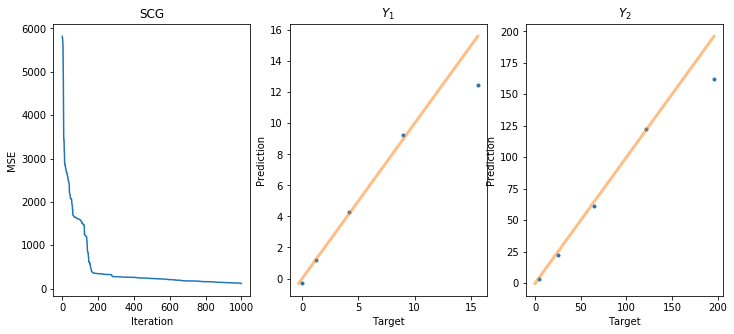

In [23]:
def plot_diagonal(T, Y):
    a = min(T.min(), Y.min())
    b = max(T.max(), Y.max())
    plt.plot([a, b], [a, b], '-', lw=3, alpha=0.5)

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.plot(result_scg['ftrace'])
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('SCG')

plt.subplot(1, 3, 2)
plt.plot(T[:, 0], Y[:, 0], '.')
plot_diagonal(T[:, 0], Y[:, 0])
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('$Y_1$')

plt.subplot(1, 3, 3)
plt.plot(T[:, 1], Y[:, 1], '.')
plot_diagonal(T[:, 1], Y[: 1])
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('$Y_2$');

## Grading

Your notebook will be run and graded automatically. Test this grading process by first downloading [A2grader.zip](http://www.cs.colostate.edu/~anderson/cs545/notebooks/A2grader.zip) and extract `A2grader.py` from it. Run the code in the following cell to demonstrate an example grading session. You should see a perfect execution score of 80/80 if your functions are defined correctly. The remaining 20 points will be based on other testing and the results you obtain and your discussions. 

A different, but similar, grading script will be used to grade your checked-in notebook. It will include additional tests. You should design and perform additional tests on all of your functions to be sure they run correctly before checking in your notebook.  

For the grading script to run correctly, you must first name this notebook as 'Lastname-A2.ipynb' with 'Lastname' being your last name, and then save this notebook.

In [24]:
%run -i A2grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Staab-A2.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing
X = np.arange(3 * 4).reshape((3, 4)) * 0.1
T = np.hstack(( np.sin(X[:, 0:1]) + X[:, 1:2],
                X[:, 2:3] * -0.5,
                X[:, 3:4] ** 2))
n_inputs = X.shape[1]
n_outputs = T.shape[1]
n_hiddens_1 = 6
n_hiddens_2 = 2
n_w = (n_inputs + 1) * n_hiddens_1 + (n_hiddens_1 + 1) * n_hiddens_2 + (n_hiddens_2 + 1) * n_outputs
w = (np.arange(n_w) - n_w/2) * 0.01
Y = network(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X)


--- 20/20 points. Returned correct values.

Testing
Y, Z1, Z2 = network(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, all_outputs=True)


--- 20/20 points. Returned correct values.

Testing
grad = error_gradient(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T)

grad [-0.01004135 -0.0140896  -0.018485

## Check-In

Do not include this section in your notebook.

Name your notebook ```Lastname-A2.ipynb```.  Submit the file using the ```Assignment 2``` link on [Canvas](https://colostate.instructure.com/courses/86986).

## Extra Credit

Train a neural network with two hidden layers with five units in each layer to predict CO from the Hour of the day.  After it is trained plot the outputs of the five units in the first hidden layer versus 100 floating point values of hour from 0 to 23 in one subplot of one figure.  Then, in another subplot plot the outputs of the five units in the second hidden layer.  In a third subplot, plot the predicted CO from the output of the neural network.  Arrange the subplots vertically.  Describe what you see in the plots.

#### Copy code to get Air Quality data
Need to do this becuase some varibles have been redefined above

In [25]:
data = pandas.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',', usecols=range(15), na_values=-200)
data = data[['Time', 'CO(GT)']]
data = data [:23 * 20]  # first 20 days of data
data = data.dropna(axis=0)
hour = [int(t[:2]) for t in data['Time']]
X = np.array(hour).reshape(-1, 1)
CO = data['CO(GT)']
T = np.array(CO).reshape(-1, 1)

#### Define the network based on description above

In [26]:
n_inputs = X.shape[1]
n_hiddens_1 = 5
n_hiddens_2 = 5
n_outputs = T.shape[1]

### Train the network
Use all three algorithms from the optimizers library to find out which one gives the best result (lowest mse)

In [27]:
n_iterations = 10000
result_sgd = opt.sgd(initial_w,
                     mse, error_gradient, fargs=[n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T],
                     n_iterations=n_iterations, learning_rate=1e-1, momentum_rate=0.2, 
                     save_wtrace=True)
print(f'SGD final error is {result_sgd["ftrace"][-1]:.3f} and it took {result_sgd["time"]:.2f} seconds')

result_adam = opt.adam(initial_w, 
                       mse, error_gradient, fargs=[n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T],
                       n_iterations=n_iterations, learning_rate=1e-2, 
                       save_wtrace=True)
print(f'Adam final error is {result_adam["ftrace"][-1]:.3f} and it took {result_adam["time"]:.2f} seconds')

result_scg = opt.scg(initial_w,
                     mse, error_gradient, fargs=[n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T],
                     n_iterations=n_iterations,
                     save_wtrace=True)
print(f'SCG final error is {result_scg["ftrace"][-1]:.3f} and it took {result_scg["time"]:.2f} seconds')

ValueError: cannot reshape array of size 321 into shape (6,1)

### Define variables needed for call to 'network'

In [ ]:
n_U = (n_inputs + 1) * n_hiddens_1
n_V = (n_hiddens_1 + 1) * n_hiddens_2
n_W = (n_hiddens_2 + 1) * n_outputs
x_test = np.linspace(0, 23, 100).reshape(-1, 1)

### Call 'network' using weights from the training step above

In [ ]:
Y, Z1, Z2 = network(
    result_adam['w'], n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, x_test, all_outputs=True)

### Plot the data

In [ ]:
plt.figure(figsize=(10, 20))
plt.subplot(3, 1, 1)
plt.title('Hidden Layer 1')
plt.plot(x_test, Z1[:,0], '.-', label='Unit 0')
plt.plot(x_test, Z1[:,1], '.-', label='Unit 1')
plt.plot(x_test, Z1[:,2], '.-', label='Unit 2')
plt.plot(x_test, Z1[:,3], '.-', label='Unit 3')
plt.plot(x_test, Z1[:,4], '.-', label='Unit 4')
plt.legend()
plt.grid(True)
plt.xlabel('Hour')
plt.ylabel('Output');

plt.subplot(3, 1, 2)
plt.title('Hidden Layer 2')
plt.plot(x_test, Z2[:,0], '.-', label='Unit 0')
plt.plot(x_test, Z2[:,1], '.-', label='Unit 1')
plt.plot(x_test, Z2[:,2], '.-', label='Unit 2')
plt.plot(x_test, Z2[:,3], '.-', label='Unit 3')
plt.plot(x_test, Z2[:,4], '.-', label='Unit 4')
plt.legend()
plt.grid(True)
plt.xlabel('Hour')
plt.ylabel('Output');

plt.subplot(3, 1, 3)
plt.title('CO estimate from network')
plt.plot(X, T, 'k.')
plt.plot(x_test, Y, '.-')
plt.grid(True)
plt.xlabel('Hour')
plt.ylabel('CO');

### Describe results